In [89]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# fix seed value for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names_np = np.array(class_names)

In [11]:
X_train = X_train / 255.
X_test = X_test / 255.

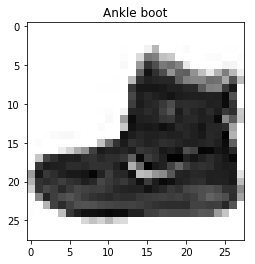

In [25]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.title(class_names[y_train[0]])
plt.show()

In [20]:
temp_h1 = np.concatenate([X_train[0], X_train[1]], axis=1)

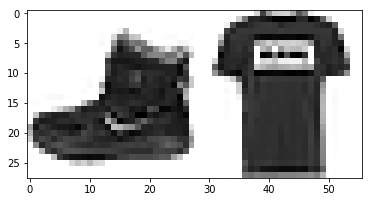

In [17]:
plt.imshow(temp_h2, cmap=plt.cm.binary)
plt.show()

In [22]:
temp_h2 = np.concatenate([X_train[3], X_train[4]], axis=1)

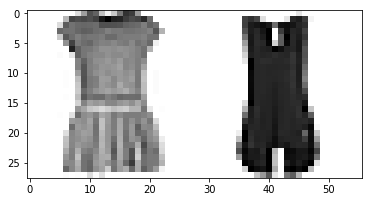

In [23]:
plt.imshow(temp_h2, cmap=plt.cm.binary)
plt.show()

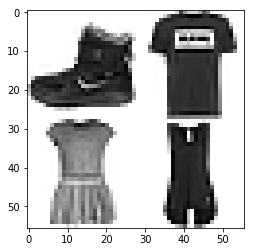

In [24]:
temp = np.concatenate([temp_h1, temp_h2], axis=0)
plt.imshow(temp, cmap=plt.cm.binary)
plt.show()

In [28]:
idx = np.random.randint(60000, size=4)
idx

array([58564, 49689, 10742, 38467])

In [71]:
num_imgs_train = 60000
num_imgs_test = 10000
X_train_len = len(X_train)
X_test_len = len(X_test)

In [72]:
X_train_mtl = np.zeros((num_imgs_train, 56, 56))
y_train_mtl = np.zeros((num_imgs_train, len(class_names)))
X_test_mtl = np.zeros((num_imgs_test, 56, 56))
y_test_mtl = np.zeros((num_imgs_test, len(class_names)))

In [73]:
X_train_mtl.shape, y_train_mtl.shape, X_test_mtl.shape, y_test_mtl.shape

((60000, 56, 56), (60000, 10), (10000, 56, 56), (10000, 10))

In [74]:
# creating dataset for training set
for i in tqdm(range(num_imgs_train)):
    idx = np.random.randint(X_train_len, size=4)
    temp_h1 = np.concatenate([X_train[idx[0]], X_train[idx[1]]], axis=1)
    temp_h2 = np.concatenate([X_train[idx[2]], X_train[idx[3]]], axis=1)
    X_train_mtl[i] = np.concatenate([temp_h1, temp_h2], axis=0)
    lb_idx = list(set([y_train[idx[0]], y_train[idx[1]], y_train[idx[2]], y_train[idx[3]]]))
    y_train_mtl[i, lb_idx] = 1    

100%|██████████| 60000/60000 [00:02<00:00, 24261.60it/s]


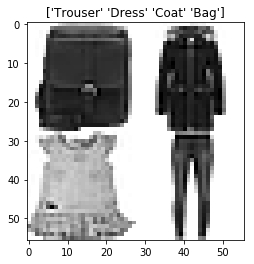

In [75]:
plt.imshow(X_train_mtl[2], cmap=plt.cm.binary)
plt.title(class_names_np[y_train_mtl[2] == 1])
plt.show()

In [76]:
# creating dataset for test set
for i in tqdm(range(num_imgs_test)):
    idx = np.random.randint(X_test_len, size=4)
    temp_h1 = np.concatenate([X_test[idx[0]], X_test[idx[1]]], axis=1)
    temp_h2 = np.concatenate([X_test[idx[2]], X_test[idx[3]]], axis=1)
    X_test_mtl[i] = np.concatenate([temp_h1, temp_h2], axis=0)
    lb_idx = list(set([y_test[idx[0]], y_test[idx[1]], y_test[idx[2]], y_test[idx[3]]]))
    y_test_mtl[i, lb_idx] = 1

100%|██████████| 10000/10000 [00:00<00:00, 12851.55it/s]


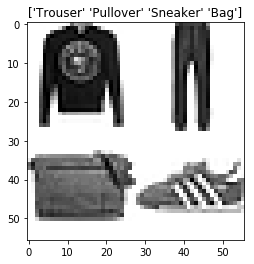

In [77]:
plt.imshow(X_test_mtl[0], cmap=plt.cm.binary)
plt.title(class_names_np[y_test_mtl[0] == 1])
plt.show()

In [78]:
X_train_mtl = np.expand_dims(X_train_mtl, axis=3)
X_test_mtl = np.expand_dims(X_test_mtl, axis=3)
X_train_mtl.shape, y_train_mtl.shape, X_test_mtl.shape, y_test_mtl.shape

((60000, 56, 56, 1), (60000, 10), (10000, 56, 56, 1), (10000, 10))

In [79]:
# build a model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(X_train_mtl.shape[1], X_train_mtl.shape[2], X_train_mtl.shape[3]), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(y_train_mtl.shape[-1], activation='sigmoid'))

# compile the model
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy)

# fit the model
history = model.fit(X_train_mtl, y_train_mtl, validation_split=0.1, epochs=50, batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 17s 316us/step - loss: 0.2736 - val_loss: 0.1799
Epoch 2/50
54000/54000 [==============================] - 16s 301us/step - loss: 0.1451 - val_loss: 0.1241
Epoch 3/50
54000/54000 [==============================] - 16s 298us/step - loss: 0.1114 - val_loss: 0.1170
Epoch 4/50
54000/54000 [==============================] - 16s 298us/step - loss: 0.0919 - val_loss: 0.1111
Epoch 5/50
54000/54000 [==============================] - 16s 297us/step - loss: 0.0787 - val_loss: 0.1097
Epoch 6/50
54000/54000 [==============================] - 16s 301us/step - loss: 0.0694 - val_loss: 0.0958
Epoch 7/50
54000/54000 [==============================] - 16s 300us/step - loss: 0.0630 - val_loss: 0.0971
Epoch 8/50
54000/54000 [==============================] - 16s 299us/step - loss: 0.0578 - val_loss: 0.1052
Epoch 9/50
54000/54000 [==============================] - 16s 296us/step - loss: 0.0530 - val_l

In [80]:
preds = model.predict(X_test_mtl)

In [81]:
preds[preds<=0.5] = 0
preds[preds>0.5] = 1
preds

array([[0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]], dtype=float32)

In [82]:
y_test_mtl

array([[0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [83]:
score = accuracy_score(preds, y_test_mtl)
score

0.5806

In [84]:
class_names_np[preds[0]>0]

array(['Trouser', 'Pullover', 'Sneaker', 'Bag'], dtype='<U11')

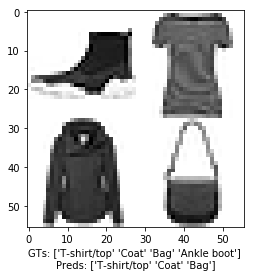

In [86]:
plt.imshow(X_test_mtl[3].squeeze(), cmap=plt.cm.binary)
# plt.title(class_names_np[y_test_mtl[2] == 1])
plt.xlabel('GTs: {} \nPreds: {}'.format(class_names_np[y_test_mtl[3] == 1], class_names_np[preds[3] > 0]))
plt.show()

In [88]:
model.save_weights('fashion_mnist_multi_label.h5')
np.save('X_train_mtl.npy', X_train_mtl)
np.save('X_test_mtl.npy', X_test_mtl)
np.save('y_train_mtl.npy', y_train_mtl)
np.save('y_test_mtl.npy', y_test_mtl)

# Prediction

In [90]:
# build a model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(X_train_mtl.shape[1], X_train_mtl.shape[2], X_train_mtl.shape[3]), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(y_train_mtl.shape[-1], activation='sigmoid'))

# compile the model
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy)

In [91]:
# load weights and test data
model.load_weights('fashion_mnist_multi_label.h5')
X_test_loaded = np.load('X_test_mtl.npy')
y_test_loaded = np.load('y_test_mtl.npy')

In [93]:
X_test_loaded.shape, y_test_loaded.shape

((10000, 56, 56, 1), (10000, 10))

In [94]:
preds = model.predict(X_test_loaded)
preds[preds <= 0.5] = 0
preds[preds > 0.5] = 1

score = accuracy_score(preds, y_test_loaded)
score

0.5806

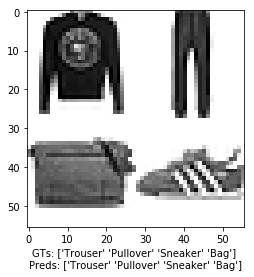

In [96]:
plt.imshow(X_test_loaded[0].squeeze(), cmap=plt.cm.binary)
plt.xlabel('GTs: {} \nPreds: {}'.format(class_names_np[y_test_loaded[0] == 1], class_names_np[preds[0] > 0]))
plt.show()